# Job Salary Prediction

Team: DataRobot

Team Members:
Dhanashree Mane,
Sanya Purwar,
Arjoo Gangwal

Python notebook version: 3

Project Description: Predicting the Job Salary based on Job Title, Company Size, Company Sector and Years of Experience using Multiple Linear Regression.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import math


C:\Users\Dhanashree\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
filename = "jobsalary.csv"

df = pd.read_csv(filename, header=0)
data = df
data.head(10)
#df.isnull().values.any()

,Company Name,Salary,Years of Experience,Location,Company Size,Sector,Job Title
0,3DI INC,167000.0,7 to 10,Los Angeles,Small-size,Software/IT,Business Analyst
1,3DI INC,123683.0,4 to 6,Los Angeles,Small-size,Software/IT,Business Analyst
2,3DI INC,80366.0,1 to 3,Los Angeles,Small-size,Software/IT,Business Analyst
3,3EDGEUSAGROUP LLC,121100.0,7 to 10,New York,Small-size,LAW,Business Analyst
4,3EDGEUSAGROUP LLC,101727.5,4 to 6,New York,Small-size,LAW,Business Analyst
5,3EDGEUSAGROUP LLC,82355.0,1 to 3,New York,Small-size,LAW,Business Analyst
6,4C Connect Inc.,149950.0,7 to 10,Atlanta,Small-size,Accounting,Business Analyst
7,4C Connect Inc.,112475.0,4 to 6,Atlanta,Small-size,Accounting,Business Analyst
8,4C Connect Inc.,75000.0,1 to 3,Atlanta,Small-size,Accounting,Business Analyst
9,A.T.KearneyInc.,150000.0,7 to 10,Atlanta,Mid-size,Consulting,Business Analyst


In [3]:
dataframe = pd.DataFrame(data)
dataframe["Sector"] = dataframe["Sector"].map(lambda x: x.strip())

# Salary Distribution

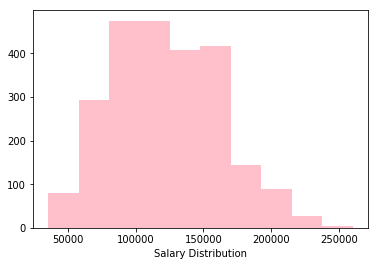

In [4]:
plt.xlabel("Salary Distribution")
plt.hist(df["Salary"], color = "pink")
plt.show()

# Comparing Salary with respect to Location

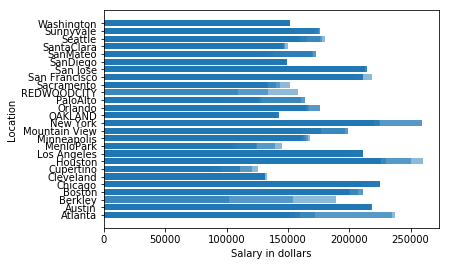

In [5]:
plt.barh(df["Location"], df["Salary"], align= "center", alpha = 0.5)
plt.ylabel("Location")
plt.xlabel("Salary in dollars")
plt.show()

# Salary with respect to Yrs of Experience 

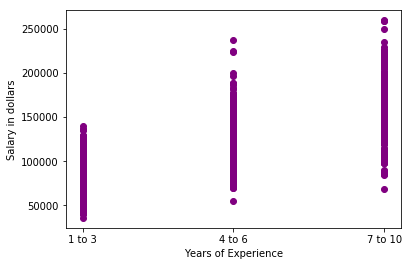

In [6]:
plt.scatter(df["Years of Experience"], df["Salary"], color = 'purple')
plt.xlabel("Years of Experience")
plt.ylabel("Salary in dollars")
plt.show()

# Salary with respect to Company Sector

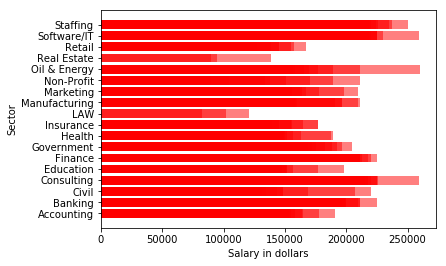

In [7]:
plt.barh(df["Sector"], df["Salary"], align= "center", alpha = 0.5, color= "red")
plt.ylabel("Sector")
plt.xlabel("Salary in dollars")
plt.show()

# Salary with respect to Company size

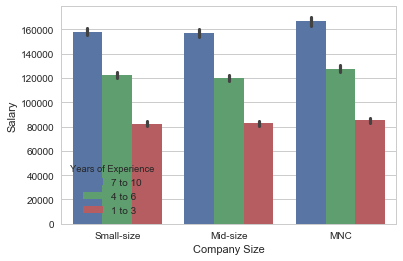

In [8]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.barplot(x="Company Size", y="Salary", hue= "Years of Experience", data=dataframe);

# Mapping the data 

In [9]:
# Mapping the year of experience

exp = {'1 to 3': 0, '4 to 6': 1, '7 to 10': 2}
data['Years of Experience'] = data['Years of Experience'].map(exp)
data.head()

,Company Name,Salary,Years of Experience,Location,Company Size,Sector,Job Title
0,3DI INC,167000.0,2,Los Angeles,Small-size,Software/IT,Business Analyst
1,3DI INC,123683.0,1,Los Angeles,Small-size,Software/IT,Business Analyst
2,3DI INC,80366.0,0,Los Angeles,Small-size,Software/IT,Business Analyst
3,3EDGEUSAGROUP LLC,121100.0,2,New York,Small-size,LAW,Business Analyst
4,3EDGEUSAGROUP LLC,101727.5,1,New York,Small-size,LAW,Business Analyst


In [10]:
# Mapping the Location

city = {"Austin": 0, "Berkley":1, "Boston": 2, "Chicago": 3, "Cupertino": 4, "Houston": 5, "Los Angeles": 6, 
        "Mountain View":7, "New York": 8, "Orlando": 9, "San Francisco":10, "San Jose": 11, "Seattle": 12, "Atlanta" : 13,
       "Cleveland": 14, "MenloPark": 15, "OAKLAND": 16, "PaloAlto": 17, "REDWOODCITY": 18, "Sacramento": 19, "SanDiego": 20,
       "SanMateo": 21, "Sunnyvale": 22, "Washington": 23, "SantaClara": 24, "Minneapolis": 25}
data["Location"] = data["Location"].map(city)
data.head()

,Company Name,Salary,Years of Experience,Location,Company Size,Sector,Job Title
0,3DI INC,167000.0,2,6,Small-size,Software/IT,Business Analyst
1,3DI INC,123683.0,1,6,Small-size,Software/IT,Business Analyst
2,3DI INC,80366.0,0,6,Small-size,Software/IT,Business Analyst
3,3EDGEUSAGROUP LLC,121100.0,2,8,Small-size,LAW,Business Analyst
4,3EDGEUSAGROUP LLC,101727.5,1,8,Small-size,LAW,Business Analyst


In [11]:
# Mapping the Company Size

size = {'Small-size': 0, 'Mid-size': 1, 'MNC': 2}
data['Company Size'] = data['Company Size'].map(size)
data.head()

,Company Name,Salary,Years of Experience,Location,Company Size,Sector,Job Title
0,3DI INC,167000.0,2,6,0,Software/IT,Business Analyst
1,3DI INC,123683.0,1,6,0,Software/IT,Business Analyst
2,3DI INC,80366.0,0,6,0,Software/IT,Business Analyst
3,3EDGEUSAGROUP LLC,121100.0,2,8,0,LAW,Business Analyst
4,3EDGEUSAGROUP LLC,101727.5,1,8,0,LAW,Business Analyst


In [12]:
# Mapping the Sector

sector = {"Oil & Energy": 0, "Accounting": 1, "Banking": 2, "Civil": 3, "Consulting":4, "Education":5, "Finance": 6,
         "Government":7, "Health": 8, "Insurance": 9, "LAW": 10, "Manufacturing": 11, "Marketing": 12, "Non-Profit": 13,
         "Software/IT": 14, "Staffing": 15, "Real Estate": 16, "Retail": 17}
data["Sector"] = data["Sector"].map(sector)
data.head()

,Company Name,Salary,Years of Experience,Location,Company Size,Sector,Job Title
0,3DI INC,167000.0,2,6,0,14,Business Analyst
1,3DI INC,123683.0,1,6,0,14,Business Analyst
2,3DI INC,80366.0,0,6,0,14,Business Analyst
3,3EDGEUSAGROUP LLC,121100.0,2,8,0,10,Business Analyst
4,3EDGEUSAGROUP LLC,101727.5,1,8,0,10,Business Analyst


## Salary based on Location & Years of Experience

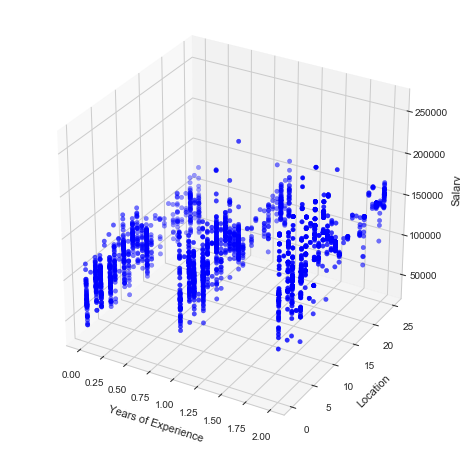

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure( figsize= (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Years of Experience"], data["Location"], data["Salary"], zdir='z', c= 'blue')


ax.set_xlabel('Years of Experience', labelpad=10)
ax.set_ylabel('Location', labelpad=10)
ax.set_zlabel('Salary', labelpad=15)

plt.savefig("demo.png")

## Correlation of numerical values of the features

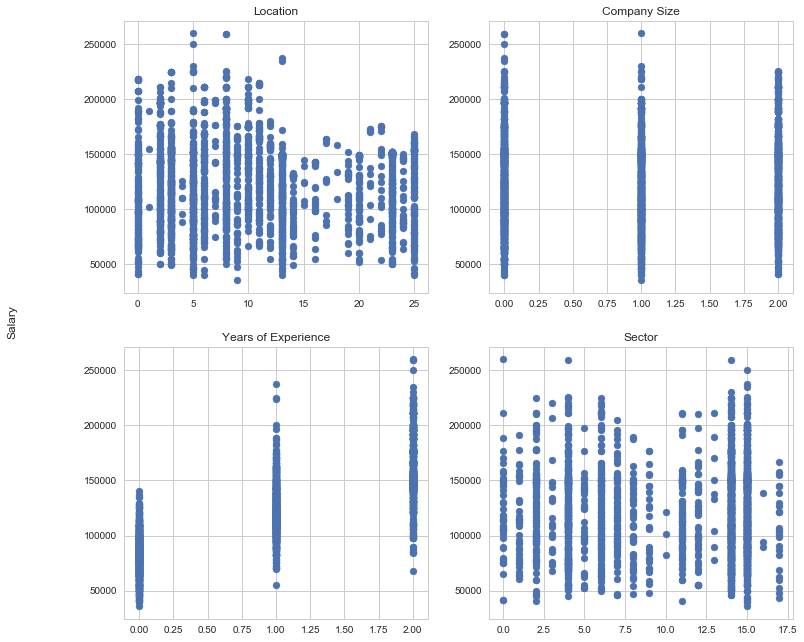

In [14]:
plt.figure(1)
f,axarr = plt.subplots(2,2, figsize=(12,11))
Salval = df['Salary'].values

axarr[0,0].scatter(df['Location'].values, df['Salary'])
axarr[0,0].set_title('Location')

axarr[0,1].scatter(df['Company Size'].values, df['Salary'])
axarr[0,1].set_title('Company Size')

axarr[1,0].scatter(df['Years of Experience'].values, df['Salary'])
axarr[1,0].set_title('Years of Experience')

axarr[1,1].scatter(df['Sector'].values, df['Salary'])
axarr[1,1].set_title('Sector')



f.text(-0.01, 0.5, 'Salary', va='center', rotation='vertical', fontsize = 12)
plt.show()

# Split the data for training and testing

In [15]:
feature_col = ["Location", "Years of Experience","Company Size","Sector" ]
X = data[feature_col]
y = data["Salary"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10, random_state = 52)

train_x = xtrain
train_y = ytrain
test_x = xtest
test_y = ytest

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x= sc.transform(test_x)

# Train the model

In [16]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
clf = regr.fit(train_x, train_y)

# Make predictions using the testing set
Sal_y_pred = regr.predict(test_x)

#Accuracy:
clf.score(test_x,test_y)

0.70769752746380643

## Dummy Variables:

Location:

0: Austin, 1: Berkley, 2: Boston, 3: Chicago, 4: Cupertino,     5: Houston,       6: Los Angeles,    7: Mountain View,
8: New York,    9: Orlando,       10: San Francisco ,        11: San Jose,    12: Seattle, 13: Atlanta, 14: Cleveland, 
15 : MenloPark, 16 : OAKLAND, 17: Palo Alto, 18: REDWOODCITY, 19: Sacramento, 20: SanDiego, 21: San Mateo
       22: Sunnyvale, 23: Washington, 24: SantaClara, 25:Minneapolis

Years of Experience:

'1 to 3'== 0, '4 to 6'== 1, '7 to 10'== 2

Company size:

'Small-size': 0, 'Mid-size': 1, 'MNC': 2

Company sector:

0 Oil & Energy      1 Accounting      2 Banking       3 Civil        4 Consulting         5 Education        6 Finance       
7 Government        8 Health          9 Insurance      10 LAW      11 Manufacturing        12 Marketing      13 Non-Profit
14 Software/IT      15 Staffing      16 Real Estate    17 Retail

# Prediction 

In [17]:
# Location: Mountain View, Yrs of exp: 4 to 6, size: MNC, Sector: Consulting

regr.predict([[7,1,2,4]])

array([ 142767.42008853])

In [18]:
# Pickling the model

In [20]:
import pickle

with open("python_lin_reg_model.pkl", "wb") as file_handler:
    pickle.dump(regr, file_handler)
with open("python_lin_reg_model.pkl", "rb") as file_handler:
    loaded_pickle = pickle.load(file_handler)